In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Gather data

Using the `frictionless.sh` script below.

In [5]:
f = open("frictionless.sh", "r")
print(f.read())
f.close()


#!/bin/bash

# Penalty only
moose -i frictionless.i Problem/type=FEProblem Outputs/file_base=penalty_out

# Augmented Lagrange
moose -i frictionless.i Outputs/file_base=al_out

# Augmented lagrange with various levels of prediction

for scale in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
do
	moose -i frictionless.i Outputs/file_base=al_predict_${scale}_out UserObjects/weighted_gap_uo/augmented_lagrange_predictor_scale=$scale
done



In [8]:
scales = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.75', '0.8', '0.85','0.9', '1.0']

penalty = pd.read_csv('penalty_out.csv')
al = pd.read_csv('al_out.csv')

al_predict = {}
for scale in scales:
  al_predict[scale] = pd.read_csv('al_predict_%s_out.csv' % scale)


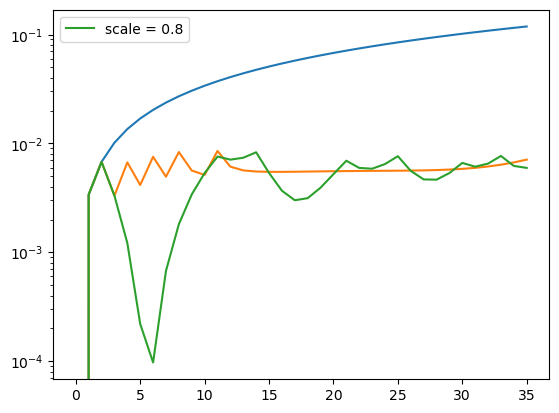

In [15]:
plt.plot(penalty['time'], abs(penalty['gap']))
plt.plot(al['time'], abs(al['gap']))

for scale in ['0.8']:
  plt.plot(al_predict[scale]['time'], abs(al_predict[scale]['gap']), label = 'scale = %s' % scale)
  
plt.legend()
plt.yscale('log')

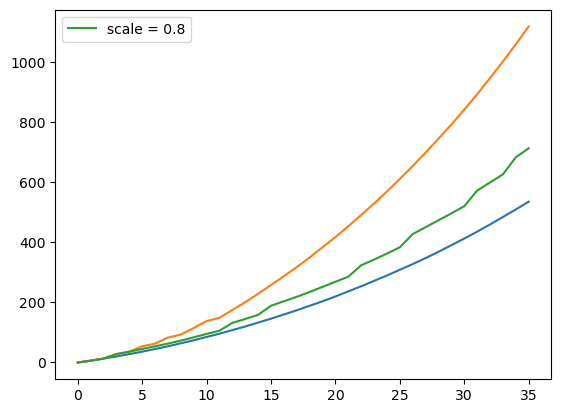

In [16]:
plt.plot(penalty['time'], penalty['cumulative'])
plt.plot(al['time'], al['cumulative'])

for scale in ['0.8']:
  plt.plot(al_predict[scale]['time'], al_predict[scale]['cumulative'], label = 'scale = %s' % scale)
  
plt.legend()

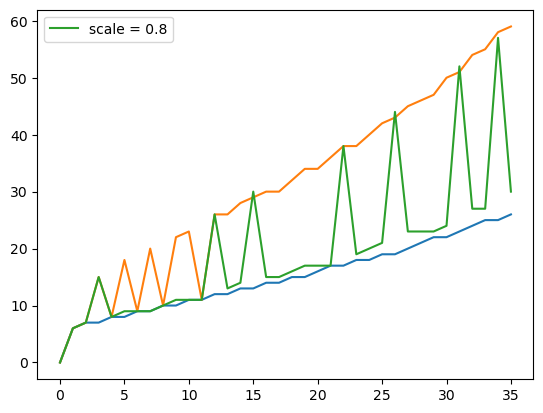

In [14]:
plt.plot(penalty['time'], penalty['num_nl'])
plt.plot(al['time'], al['num_nl'])

for scale in ['0.8']:
  plt.plot(al_predict[scale]['time'], al_predict[scale]['num_nl'], label = 'scale = %s' % scale)
  
plt.legend()

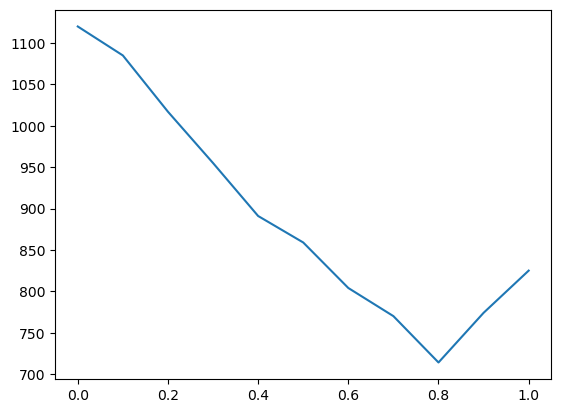

In [25]:
x = [0]
y = [float(al['cumulative'][-1:])]
for scale in scales:
  x.append(float(scale))
  y.append(float(al_predict[scale]['cumulative'][-1:]))

plt.plot(x, y)


In [24]:
x

[0,
 0.1,
 1085.0,
 0.2,
 1017.0,
 0.3,
 955.0,
 0.4,
 891.0,
 0.5,
 859.0,
 0.6,
 804.0,
 0.7,
 770.0,
 0.8,
 714.0,
 0.9,
 774.0,
 1.0,
 825.0]